# Лабораторная работа №1

## Градиентный спуск и его модификации


*   Выбрать тестовые функции оптимизации (2 шт - Бута и Трехгорбого верблюда)
*   Запрограммировать собственнуб реализацию классического градиентного спуска
*   Запрограммировать пайлайн тестирования алгоритма оптимизации
 *   Визуализации функции и точки оптимума
 *   Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
 *   Визуализации точки найденного решения (можно добавить анимацию на плюс балл)
*   Запрограммировать метод вычисления градиента
 *   Передача функции градиента от пользователя
 *   Символьное вычисление градиента (например с помощью sympy) (на доп балл)
*   Запрограммировать одну моментную модификацию и протестировать ее
*   Запрограммировать одну адаптивную модификацию и протестировать ее
*   Запрограммировать метод эволюции темпа обучения и/или метод выбора начального приближения и протестировать их


---






Импорт необходимых библиотек

In [54]:
from matplotlib.animation import FuncAnimation
from IPython.display import display, Image
from matplotlib import pyplot as plt
from numpy import linalg as la
from datetime import datetime
from sympy.abc import x, y
from matplotlib import cm
import numpy as np
from sympy import *

Тестовые функции для оптимизации


1.   Функция трехгорбого верблюда
2.   Функция Бута



*   func - функция
*   domain - область определения
*   func_min - глоб.минимум и значения в нем
*   gradient - градиент функции






In [55]:
class THK_func():
  @staticmethod
  def func(x):
        return 2 * x[0] ** 2 - 1.05 * x[0] ** 4 + ((x[0] ** 6) / 6) + x[0] * x[1] + x[1] ** 2

  @staticmethod
  def domain():
    return np.array([[-5, -5], [5, 5]])

  @staticmethod
  def func_min():
        return np.array([0., 0., 0.])

  @staticmethod
  def gradient(x):
        return np.array([(x[0] ** 5 - 4.2 * x[0] ** 3 + 4 * x[0] + x[1]), (x[0] + 2 * x[1])])


In [56]:
class Byta_func():
  @staticmethod
  def func(x):
        return (x[0] + 2 * x[1] - 7) ** 2 + (2 * x[0] + x[1] - 5) ** 2

  @staticmethod
  def domain():
    return np.array([[-10, -10], [10, 10]])

  @staticmethod
  def func_min():
        return np.array([1., 3., 0.])

  @staticmethod
  def gradient(x):
        return np.array([(8 * x[0] + 4 * x[1] * (2 * x[0] * x[1] - 7) + 4 * x[1] - 20), (4 * x[0] * (2 * x[0] * x[1] - 7) + 4 * x[0] + 2 * x[1] - 10)])


Функция визуализации

In [57]:
def draw_result(f: callable, domain: np.array, glob_min: np.array, history: np.array, title: str) -> None:

    graph = plt.figure(figsize=(15, 15))
    ax = plt.axes(projection='3d')

    x = np.linspace(domain[0, 0], domain[1, 0], 100)
    y = np.linspace(domain[0, 1], domain[1, 1], 100)

    x_grid, y_grid = np.meshgrid(x, y)
    z_grid = f(np.array([x_grid, y_grid]))

    ax.plot_surface(x_grid, y_grid, z_grid, cmap='plasma', alpha=0.4)
    ax.scatter3D(history[0, 0], history[0, 1], history[0, 2], s=100, c="black", lw=2, ec='black', marker='o')

    for i in range(1, len(history)):
        ax.plot([history[i - 1, 0], history[i, 0]], [history[i - 1, 1], history[i, 1]], [history[i - 1, 2], history[i, 2]],
                '--', c='black', alpha=1)

    ax.scatter3D(history[-1, 0], history[-1, 1], history[-1, 2], s=150, c="yellow", lw=2, ec='orange', marker='*', alpha=1)
    ax.scatter3D(glob_min[0], glob_min[1], glob_min[2], s=200, c="red", ec='black', marker='o', alpha=0.7)

    np.set_printoptions(formatter={'float_kind': "{:.2f}".format})
    print(f"Стартовая точка:\t{history[0]}")
    np.set_printoptions(formatter={'float_kind': "{:.2e}".format})
    print(f"Найденный минимум:\t{history[-1]}")
    print(f"Глобальный минимум:\t{glob_min}")
    print(f"Погрешность результата:\t{(glob_min[2]-history[-1][2])}")
    print(f"Кол-во шагов:\t{len(history)}")

    ax.set_title(title, fontsize=14, fontweight="bold", loc="left")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    plt.show()


Градиентный спуск

In [58]:
def gradient_descent(f, grad, start_params, glob_min, max_iter=1000, lr=0.1, delta=0.001):
    params = start_params.copy()
    history = [np.array([params[0], params[1], f(params)])]

    step = 0
    while step < max_iter and (history[-1][2] - glob_min[2]) > delta:
        params = params - lr * grad(params)
        history.append(np.array([params[0], params[1], f(params)]))
        step += 1

    return np.array(history)


 Для функции Бута

Результаты (ф-я Бута)
0:00:00.258271
Стартовая точка:	[-9.00 5.00 360.00]
Найденный минимум:	[1.32e+00 2.62e+00 2.59e-01]
Глобальный минимум:	[1.00e+00 3.00e+00 0.00e+00]
Погрешность результата:	-0.25894554897102917
Кол-во шагов:	15001


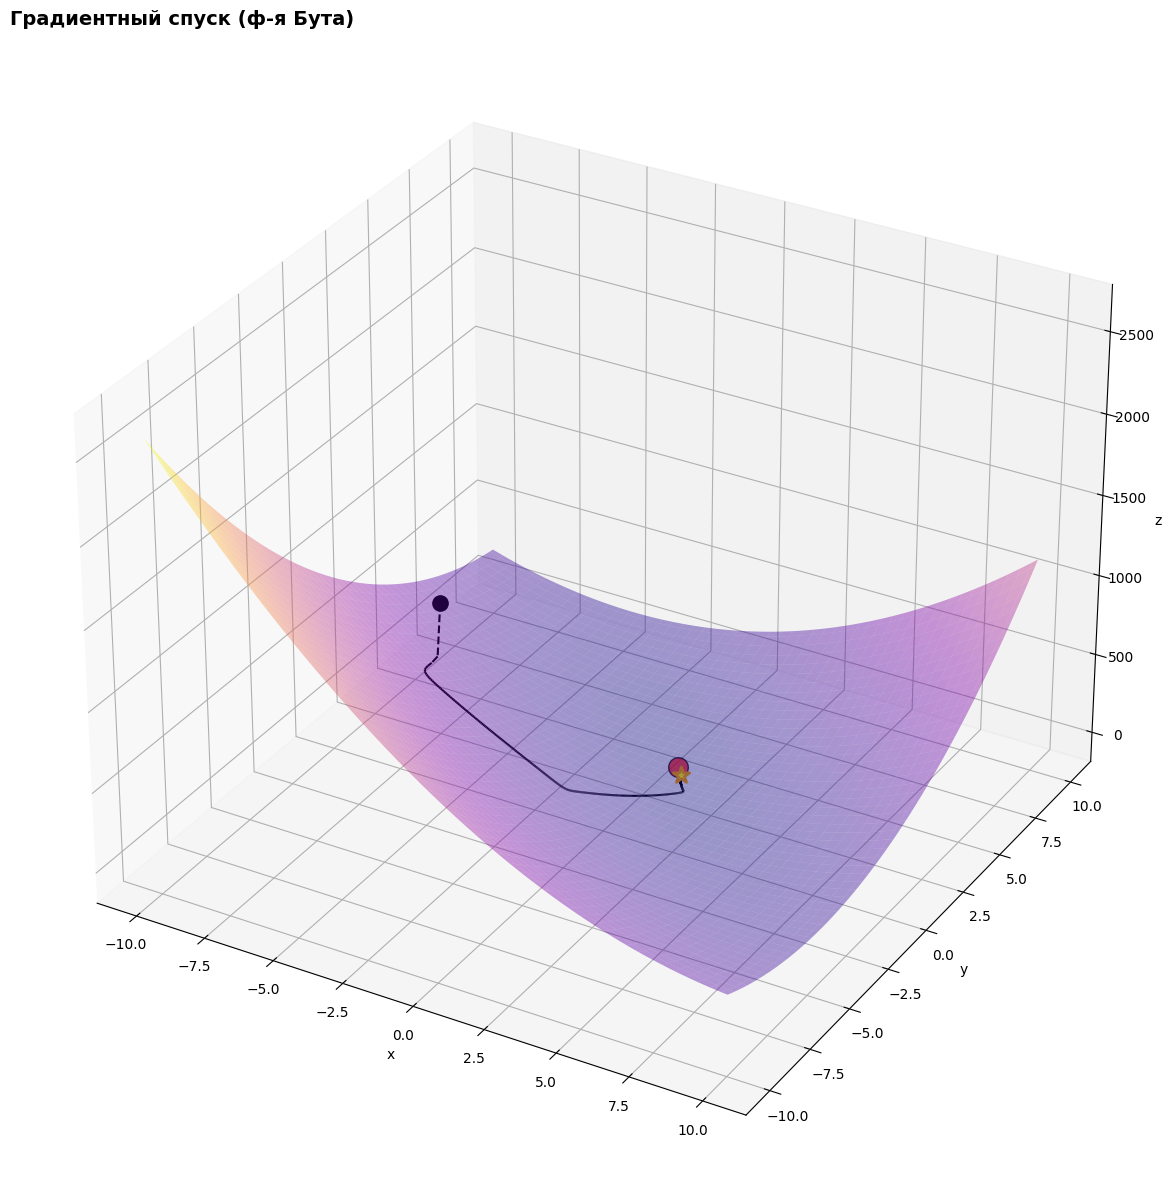

Результаты (ф-я Бута)
0:00:00.191951
Стартовая точка:	[-7.00 -7.00 1460.00]
Найденный минимум:	[1.32e+00 2.62e+00 2.59e-01]
Глобальный минимум:	[1.00e+00 3.00e+00 0.00e+00]
Погрешность результата:	-0.25913275083985915
Кол-во шагов:	15001


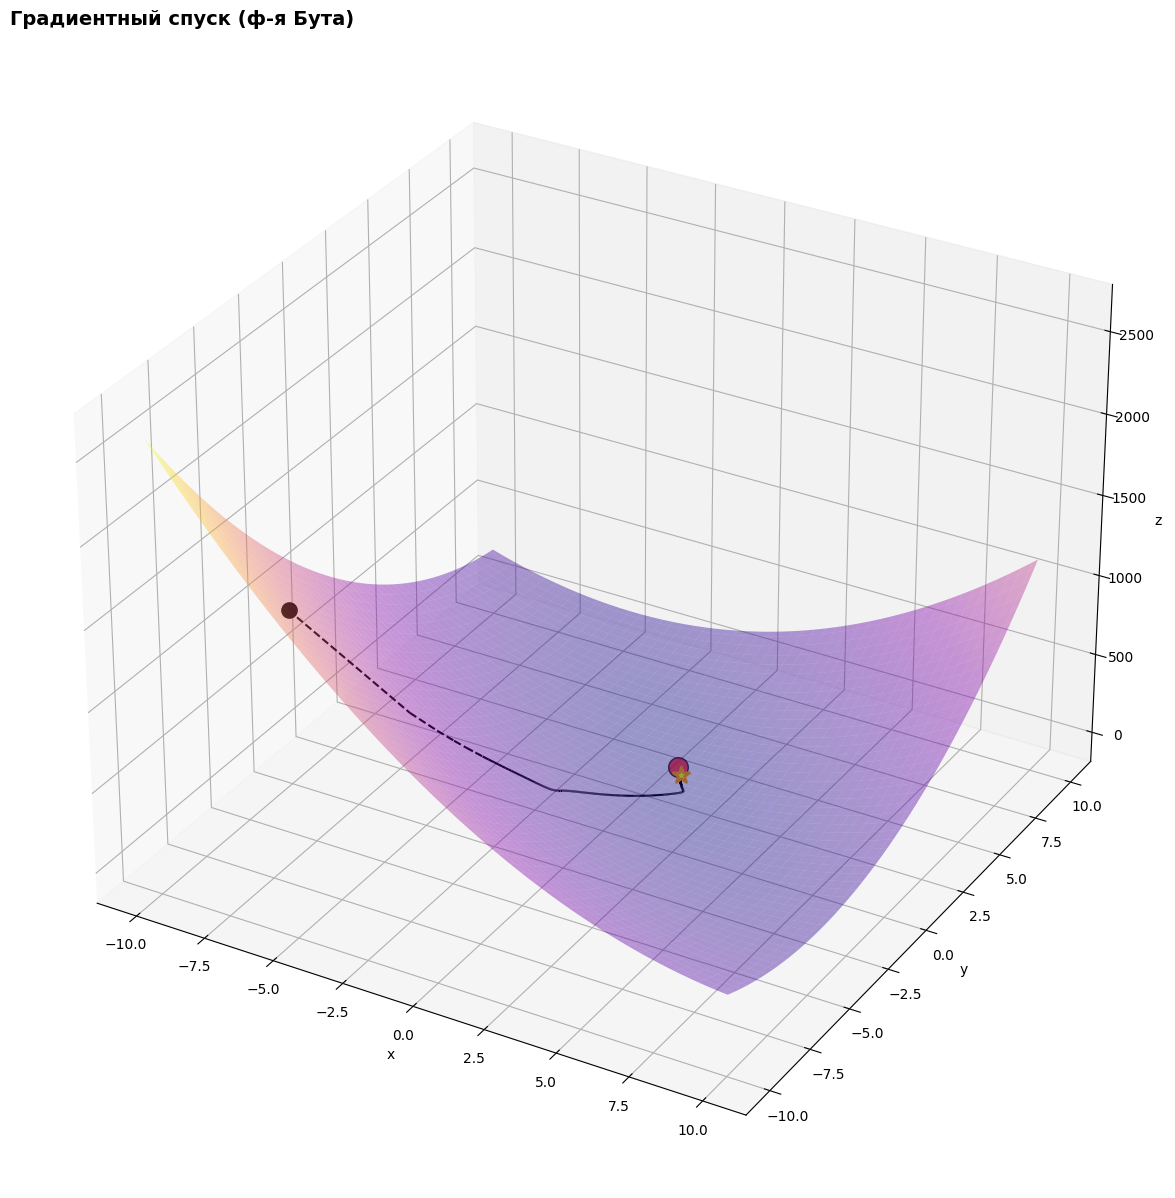

Результаты (ф-я Бута)
0:00:00.254714
Стартовая точка:	[5.00 -6.00 197.00]
Найденный минимум:	[1.32e+00 2.62e+00 2.59e-01]
Глобальный минимум:	[1.00e+00 3.00e+00 0.00e+00]
Погрешность результата:	-0.25933878755486967
Кол-во шагов:	15001


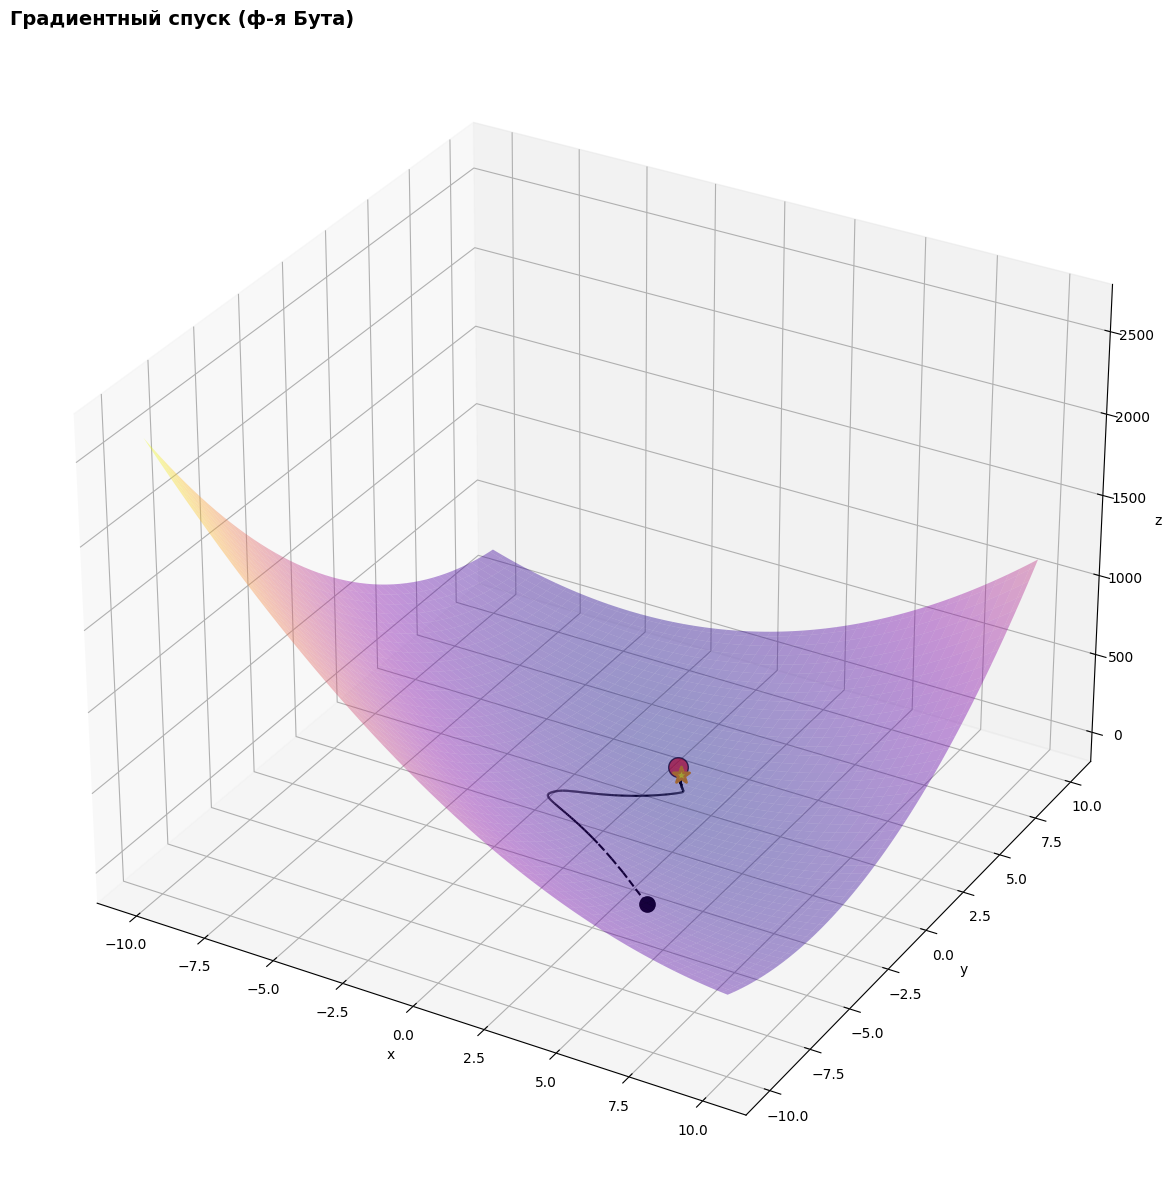

Результаты (ф-я Бута)
0:00:00.204416


In [ ]:
start_points = [[-9, 5], [-7, -7], [5, -6], [11, 4]]
for i in start_points:
    start_time = datetime.now()
    history = gradient_descent(Byta_func.func, Byta_func.gradient, i, Byta_func.func_min(), max_iter=15000, lr=0.001)
    print(f"Результаты (ф-я Бута)\n{datetime.now() - start_time}")
    draw_result(Byta_func.func, Byta_func.domain(), Byta_func.func_min(), history, "Градиентный спуск (ф-я Бута)")

Для трехгорбого верблюда

Результаты (ф-я трехгорбого верблюда)
0:00:00.147449
Стартовая точка:	[-3.00 3.00 54.45]
Найденный минимум:	[-1.75e+00 8.74e-01 2.99e-01]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Погрешность результата:	-0.29863844223685854
Кол-во шагов:	10001


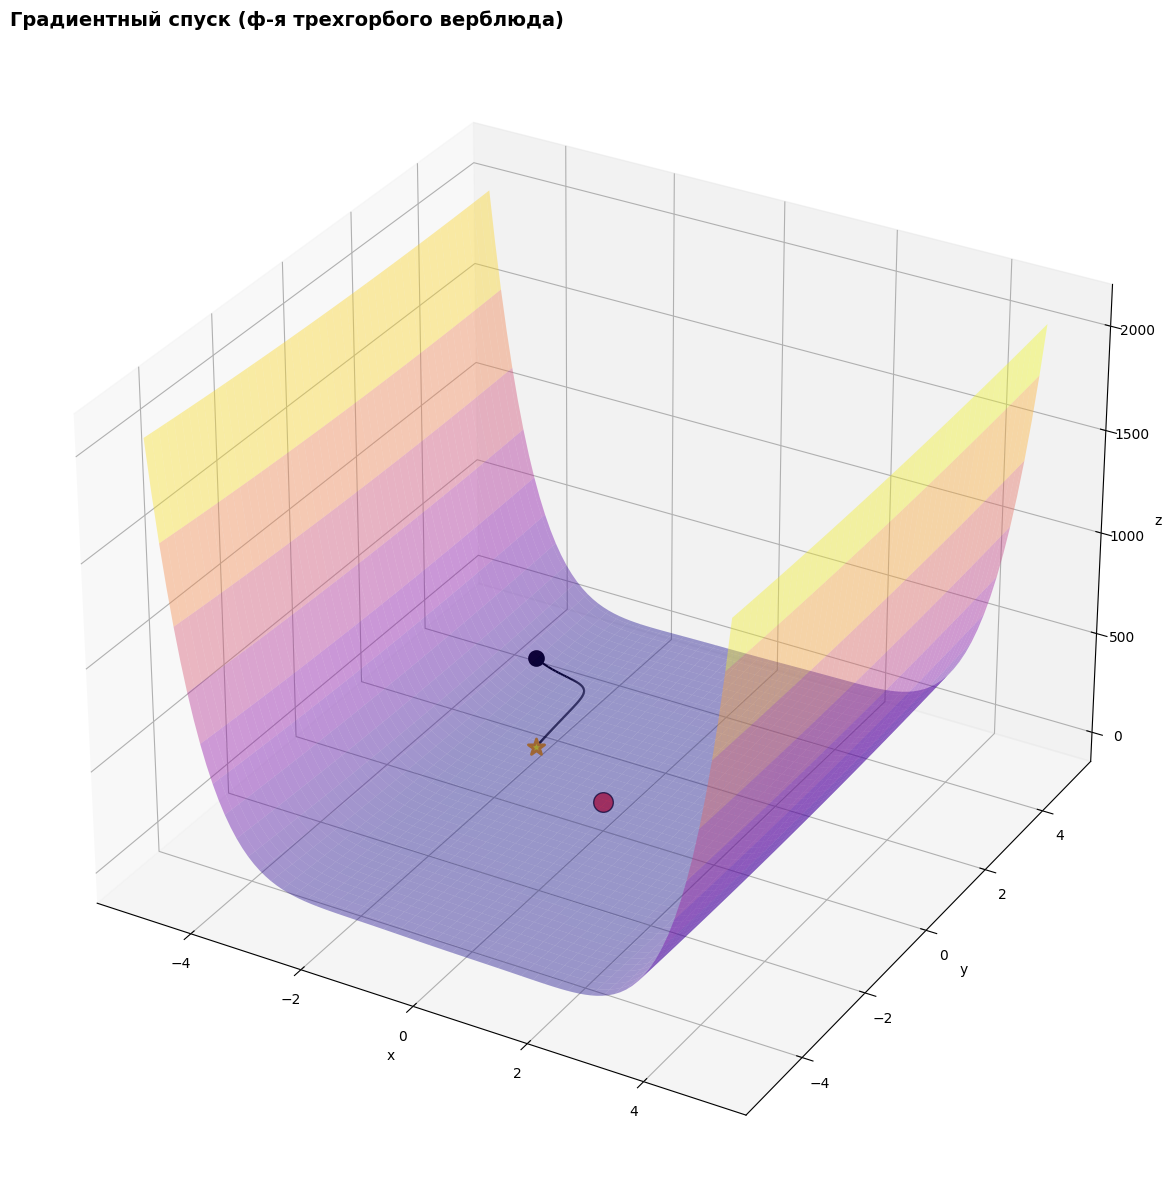

Результаты (ф-я трехгорбого верблюда)
0:00:00.071271
Стартовая точка:	[-2.00 -5.00 36.87]
Найденный минимум:	[1.36e-03 -3.28e-03 9.98e-06]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Погрешность результата:	-9.97905625135236e-06
Кол-во шагов:	4275


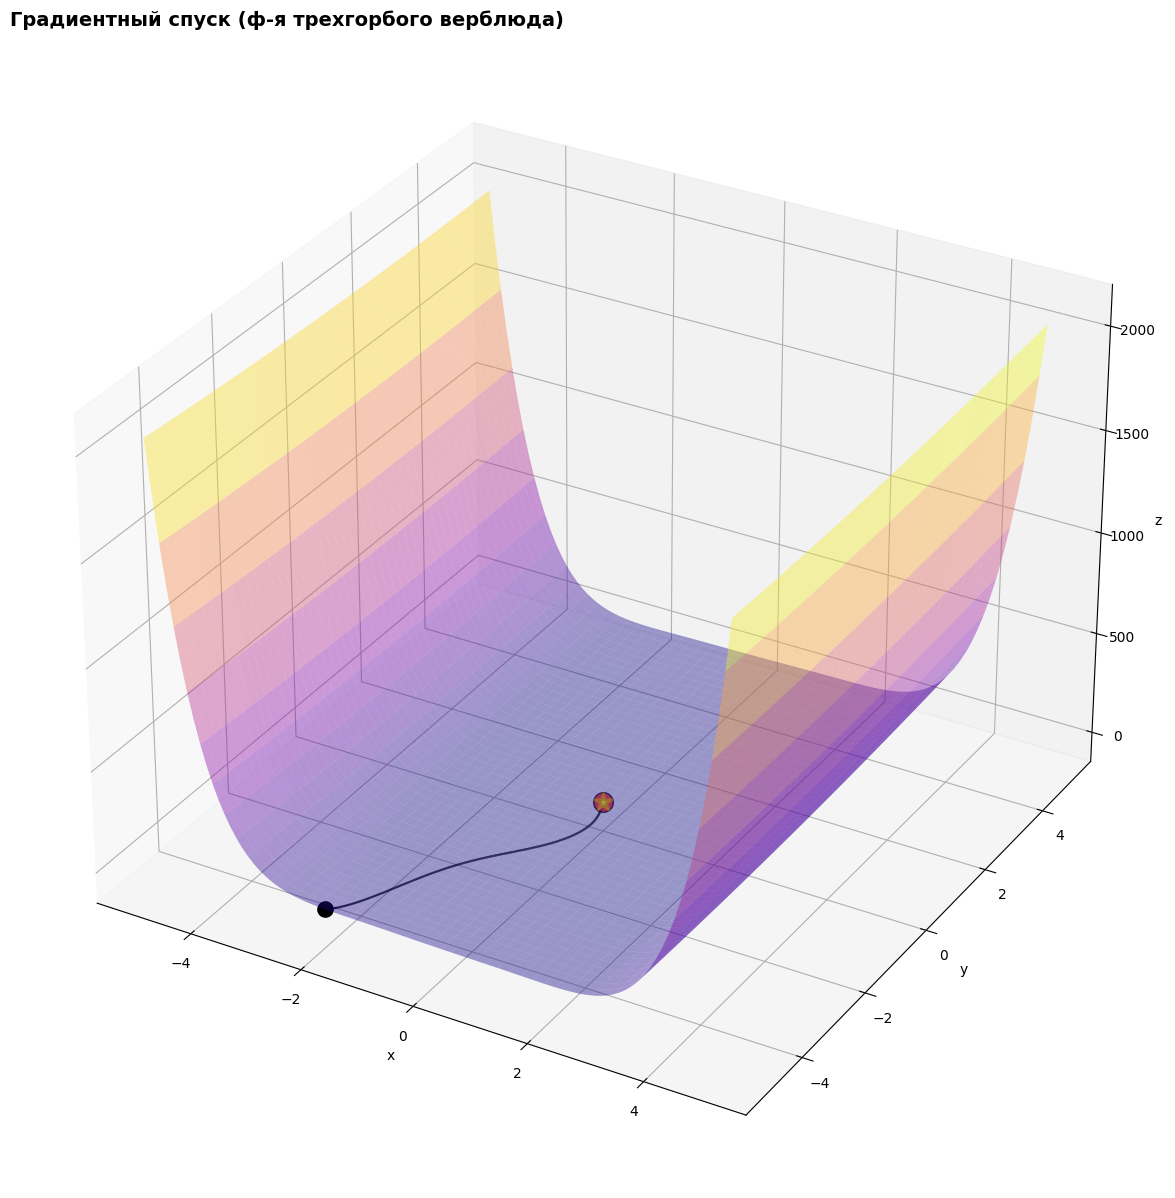

Результаты (ф-я трехгорбого верблюда)
0:00:00.049877
Стартовая точка:	[4.00 4.00 477.87]
Найденный минимум:	[-1.36e-03 3.28e-03 9.98e-06]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Погрешность результата:	-9.977369475482832e-06
Кол-во шагов:	3688


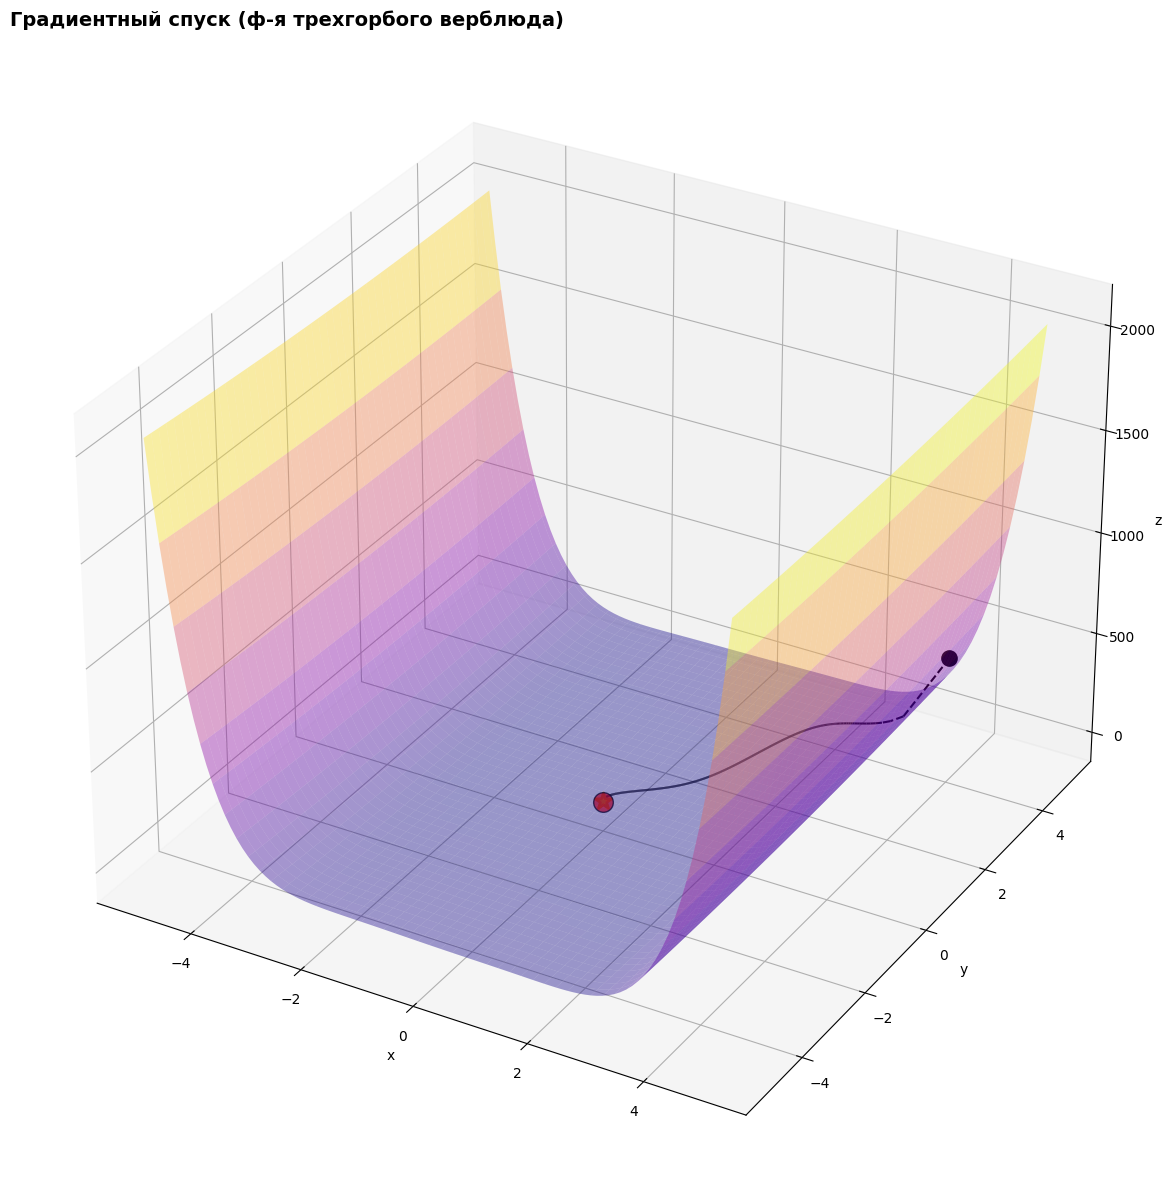

Результаты (ф-я трехгорбого верблюда)
0:00:00.137370
Стартовая точка:	[-3.00 -3.00 72.45]
Найденный минимум:	[-1.75e+00 8.74e-01 2.99e-01]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Погрешность результата:	-0.2986384422368613
Кол-во шагов:	10001


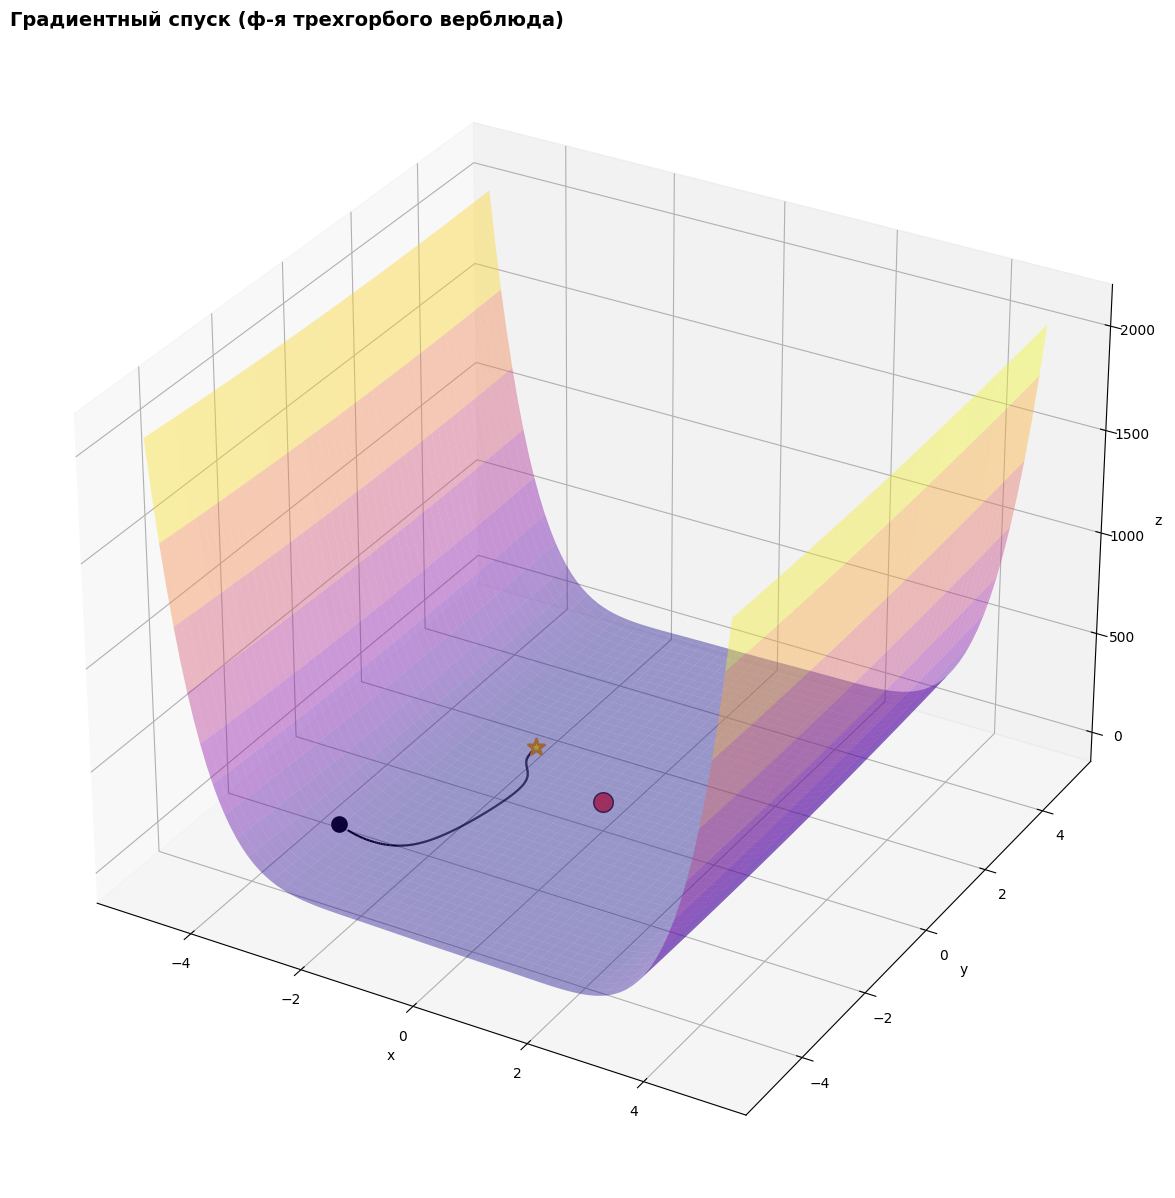

In [60]:
start_points = [[-3, 3], [-2, -5], [4, 4], [-3, -3]]
for i in start_points:
    start_time = datetime.now()
    history = gradient_descent(THK_func.func, THK_func.gradient, i, THK_func.func_min(), max_iter=15000, lr=0.001, delta=0.00001)
    print(f"Результаты (ф-я трехгорбого верблюда)\n{datetime.now() - start_time}")
    draw_result(THK_func.func, THK_func.domain(), THK_func.func_min(), history, "Градиентный спуск (ф-я трехгорбого верблюда)")


Моментная модификация градиентного спуска




In [61]:
def momentum_gradient_descent(
    f: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray,
    max_iter: int = 1000, lr: float = 0.1, delta: float = 0.001, beta: float = 0.5
) -> np.array:
    params_prev = params = start_params.copy()
    history = [np.array([params[0], params[1], f(params)])]
    step = 0
    while step < max_iter and la.norm(history[-1] - glob_min) > delta:
        params_new = params - lr * grad(params) + beta * (params - params_prev)
        params_prev, params = params, params_new
        history.append(np.array([params[0], params[1], f(params)]))
        step += 1
    return np.array(history)


Моментная модификация градиентного спуска для Бута

Результаты (ф-я Бута)
0:00:00.229219
Стартовая точка:	[-7.00 -7.00 1460.00]
Найденный минимум:	[1.32e+00 2.62e+00 2.61e-01]
Глобальный минимум:	[1.00e+00 3.00e+00 0.00e+00]
Погрешность результата:	-0.26099695639970993
Кол-во шагов:	10001


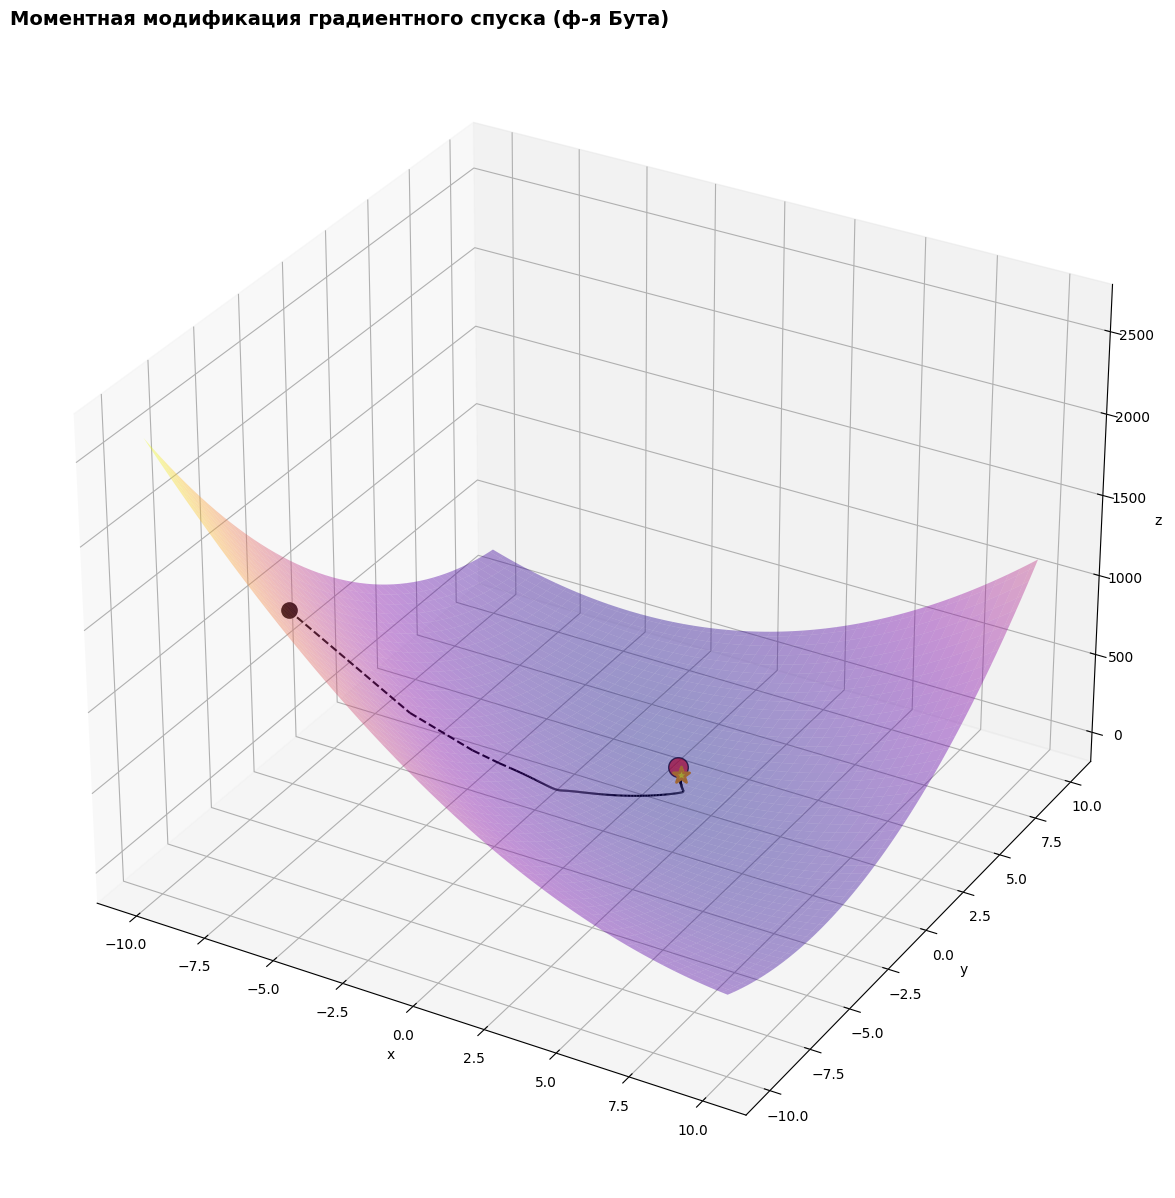

In [62]:
start_params = np.array([-7, -7])
max_iter, lr, delta, beta = 10000, 0.001, 0.00001, 0.3

start_time = datetime.now()
history = momentum_gradient_descent(Byta_func.func, Byta_func.gradient, start_params, Byta_func.func_min(), max_iter, lr, delta, beta)
print(f"Результаты (ф-я Бута)\n{datetime.now() - start_time}")
draw_result(Byta_func.func, Byta_func.domain(), Byta_func.func_min(), history, "Моментная модификация градиентного спуска (ф-я Бута)")



Моментная модификация градиентного спуска для трехгорбого верблюда

Результаты (ф-я трехгорбого верблюда)
0:00:00.010478
Стартовая точка:	[-2.00 -5.00 36.87]
Найденный минимум:	[9.04e-04 -3.74e-04 1.44e-06]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Погрешность результата:	-1.4366096795815305e-06
Кол-во шагов:	208


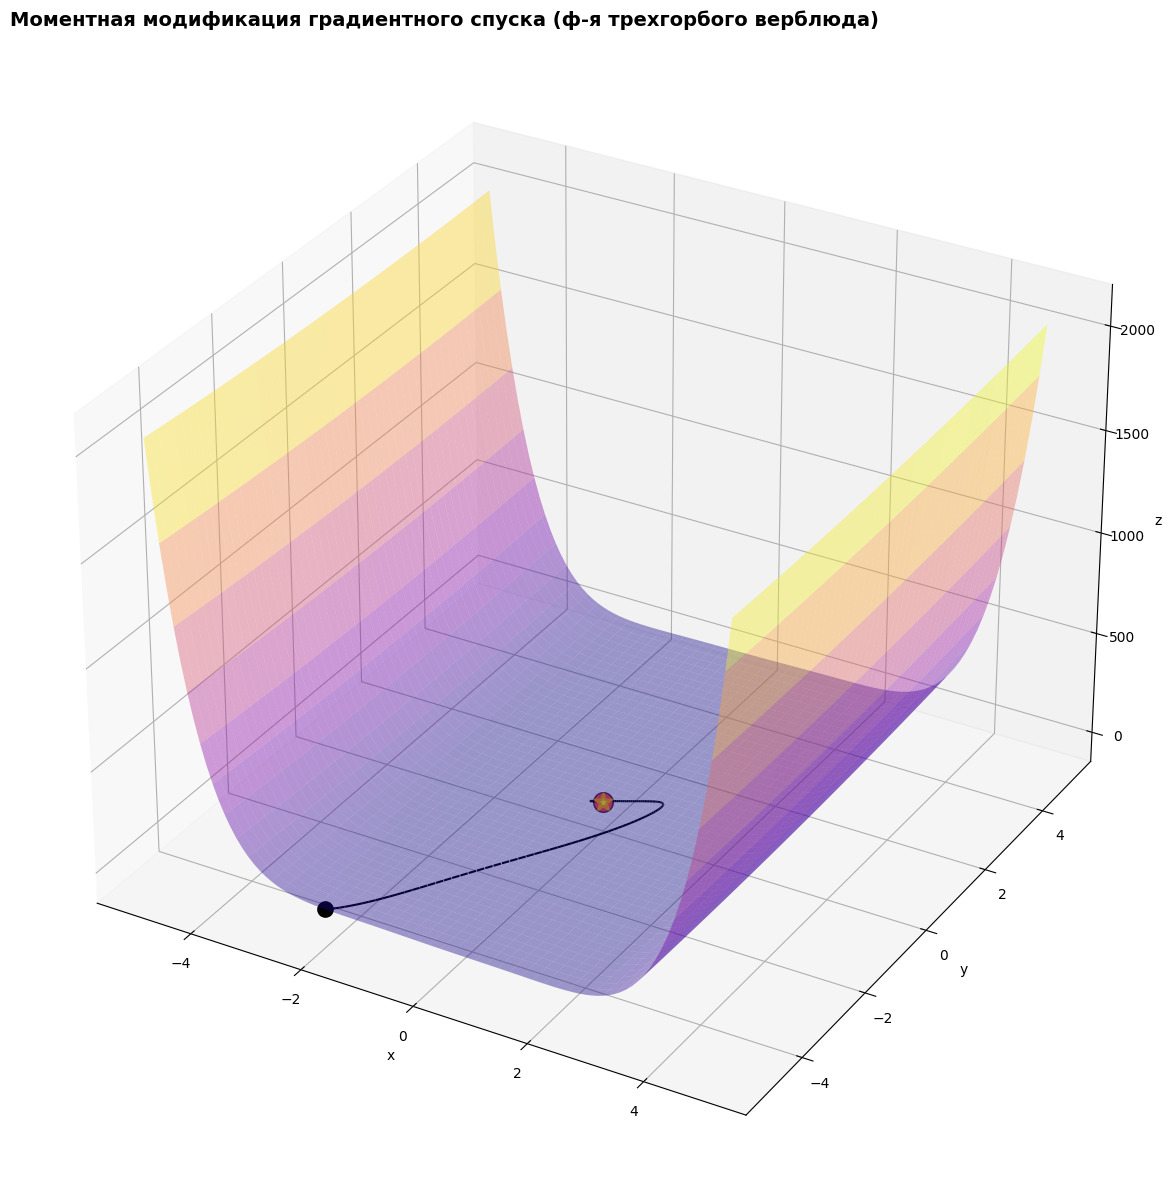

In [63]:
start_params = np.array([-2, -5])
max_iter, lr, beta = 10000, 0.001, 0.95

start_time = datetime.now()
history = momentum_gradient_descent(THK_func.func, THK_func.gradient, start_params, THK_func.func_min(), max_iter, lr, beta=beta)
print(f"Результаты (ф-я трехгорбого верблюда)\n{datetime.now() - start_time}")
draw_result(THK_func.func, THK_func.domain(), THK_func.func_min(), history, "Моментная модификация градиентного спуска (ф-я трехгорбого верблюда)")



Адаптивный метод градиентного спуска (метод Adam)

In [64]:
def adam_gradient_descent(
    f: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray,
    max_iter: int = 1000, lr: float = 0.1, b1: float = 0.9, b2: float = 0.999,
    e: float = 1e-8, delta: float = 0.001
) -> np.array:
    params, history, m, v = start_params.copy(), [np.array([start_params[0], start_params[1], f(start_params)])], np.array([0, 0]), np.array([0, 0])

    step = 0
    while step < max_iter and la.norm(history[-1] - glob_min) > delta:
        m = b1 * m + (1 - b1) * grad(params)
        v = b2 * v + (1 - b2) * grad(params) ** 2
        params = params - lr * m / (np.sqrt(v) + e)
        history.append(np.array([params[0], params[1], f(params)]))
        step += 1

    return np.array(history)


Адаптивный метод градиентного спуска для Бута

Результаты (ф-я Бута)
 0:00:00.389833
Стартовая точка:	[-7.00 -7.00 1460.00]
Найденный минимум:	[1.35e+00 2.56e+00 3.50e-01]
Глобальный минимум:	[1.00e+00 3.00e+00 0.00e+00]
Погрешность результата:	-0.3502077469744347
Кол-во шагов:	10001


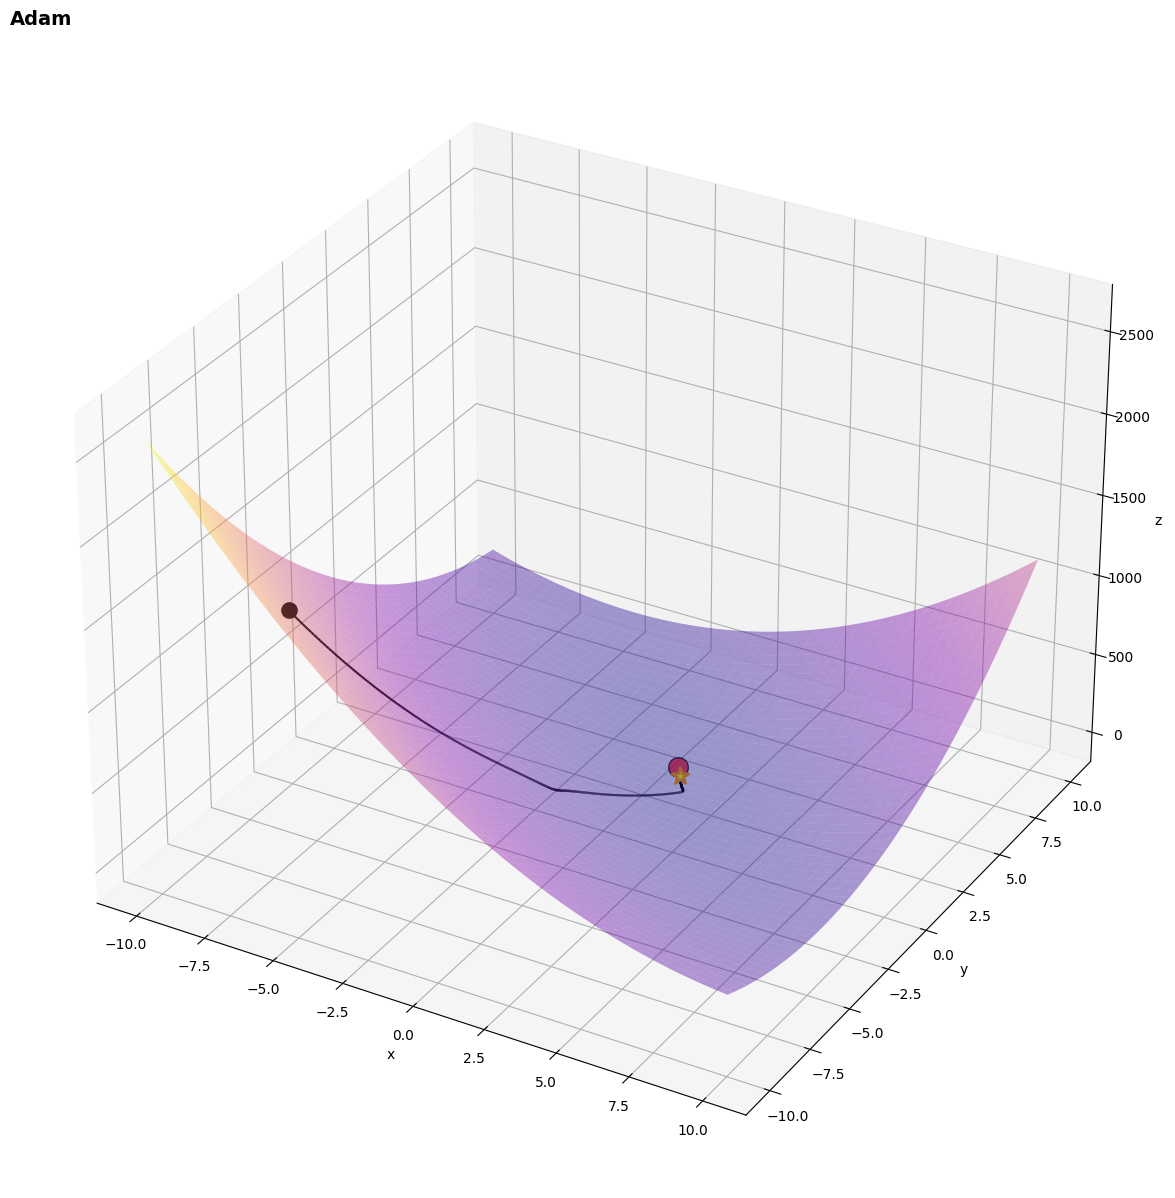

In [65]:
start_time = datetime.now()
history = adam_gradient_descent(Byta_func.func, Byta_func.gradient, np.array([-7,-7]), Byta_func.func_min(), max_iter = 10000, lr = 0.01)
print("Результаты (ф-я Бута)\n", datetime.now() - start_time)
draw_result(Byta_func.func, Byta_func.domain(), Byta_func.func_min(), history, "Adam")


Адаптивный метод градиентного спуска для трехгорбого верблюда

Результаты (ф-я трехгорбого верблюда)
 0:00:00.037592
Стартовая точка:	[-2.00 -5.00 36.87]
Найденный минимум:	[3.04e-04 -9.48e-04 7.96e-07]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Погрешность результата:	-7.959224333898267e-07
Кол-во шагов:	786


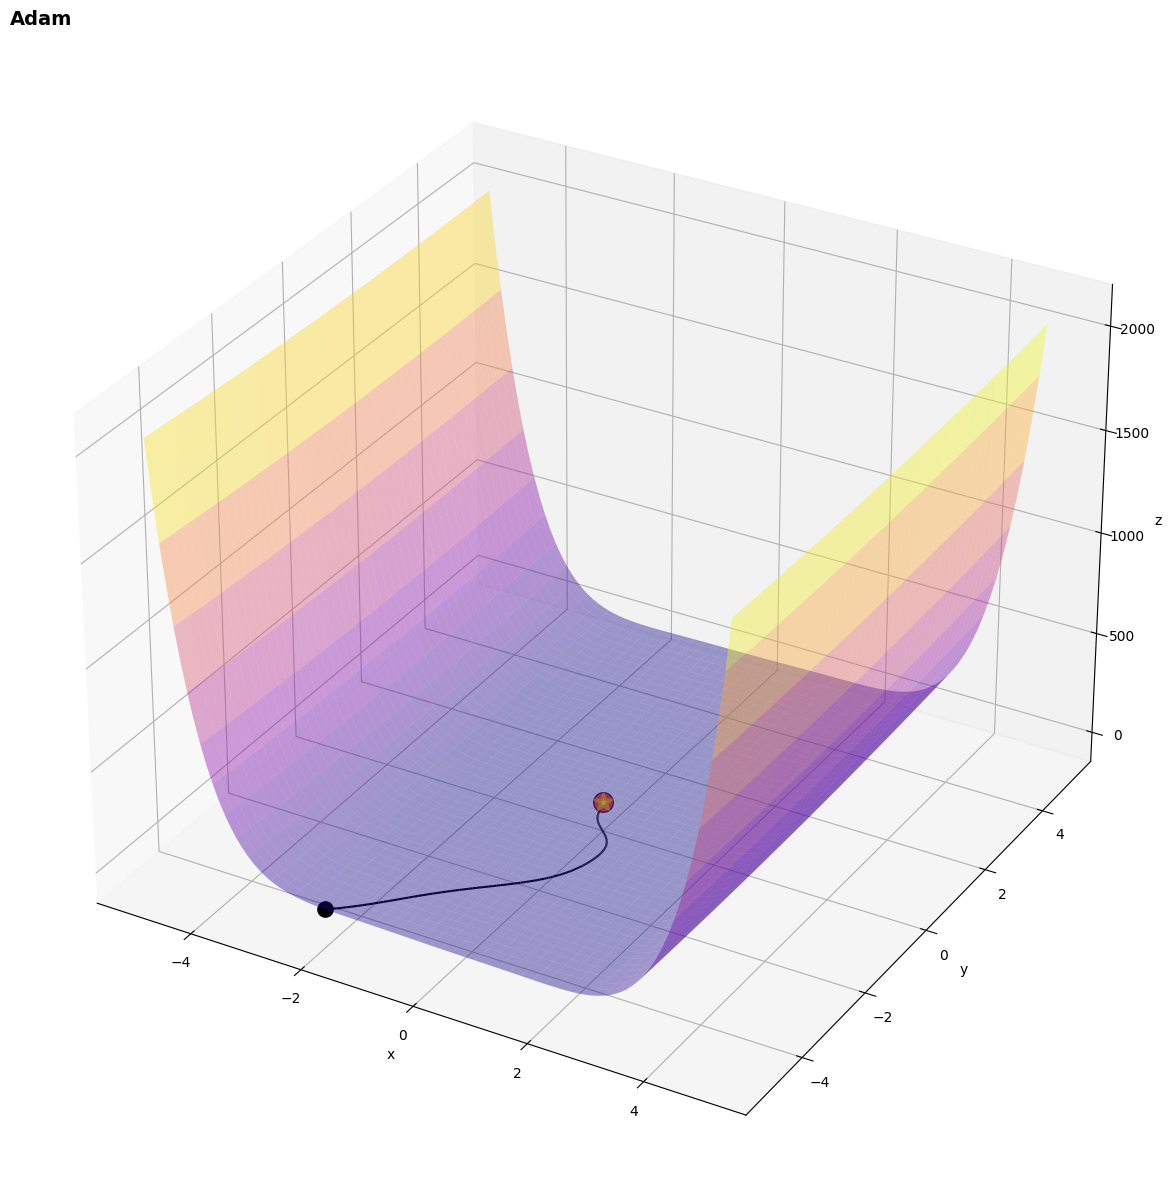

In [66]:
start_time = datetime.now()
history = adam_gradient_descent(THK_func.func, THK_func.gradient, np.array([-2,-5]), THK_func.func_min(), max_iter = 10000, lr = 0.01)
print("Результаты (ф-я трехгорбого верблюда)\n", datetime.now() - start_time)
draw_result(THK_func.func, THK_func.domain(), THK_func.func_min(), history, "Adam")


Ввод функции от пользователя

In [67]:
def func(fx):
  x, y = symbols('x y')
  gfg = sympify(Func)
  substitutions = {x: fx[0], y: fx[1]}
  return float(gfg.subs(substitutions))

In [68]:
def domain(xy_min):
  return np.array([[xy_min[0] - 10, xy_min[1] - 10], [xy_min[0] + 10, xy_min[1] + 10]])

def func_min():
      return np.array([0., 0., 0.])

def gradient(xy):
  x, y = symbols('x y')
  gfg = sympify(Func)
  substitutions = {x: xy[0], y: xy[1]}
  diffX = diff(gfg, x)
  diffY = diff(gfg, y)
  return np.array([float(diffX.subs(substitutions)), float(diffY.subs(substitutions))])


In [69]:
def draw_result_func(func: callable, history: np.array) -> None:
  graph = plt.figure(figsize=(15,15))
  ax = plt.axes(projection = '3d')
  x = np.linspace(-10, 10, 100)
  y = np.linspace(-10, 10, 100)
  x_grid, y_grid = np.meshgrid(x,y)
  z = []
  for i in range(len(x)):
    a = func(np.array([x[i], y[i]]))
    z.append(a)

  z_grid=np.asarray(np.meshgrid(z))
  ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'plasma', alpha=0.2)
  ax.plot(history[:, 0], history[:, 1], history[:, 2], '--', c='black', alpha = 1)
  ax.scatter3D(history[0, 0], history[0, 1], history[0, 2], s=200, c="red", lw=2, ec='black', marker = 'o', alpha = 0.7)
  ax.scatter3D(history[-1, 0], history[-1, 1], history[-1, 2], s=150, c="yellow", lw=2, ec='orange', marker = '*', alpha = 1)



Передача функции градиента от пользователя

Введите функцию: x**2 + y**2
Результаты для x**2 + y**2
 0:00:11.522830
[2.23e-02 2.23e-02 9.97e-04]


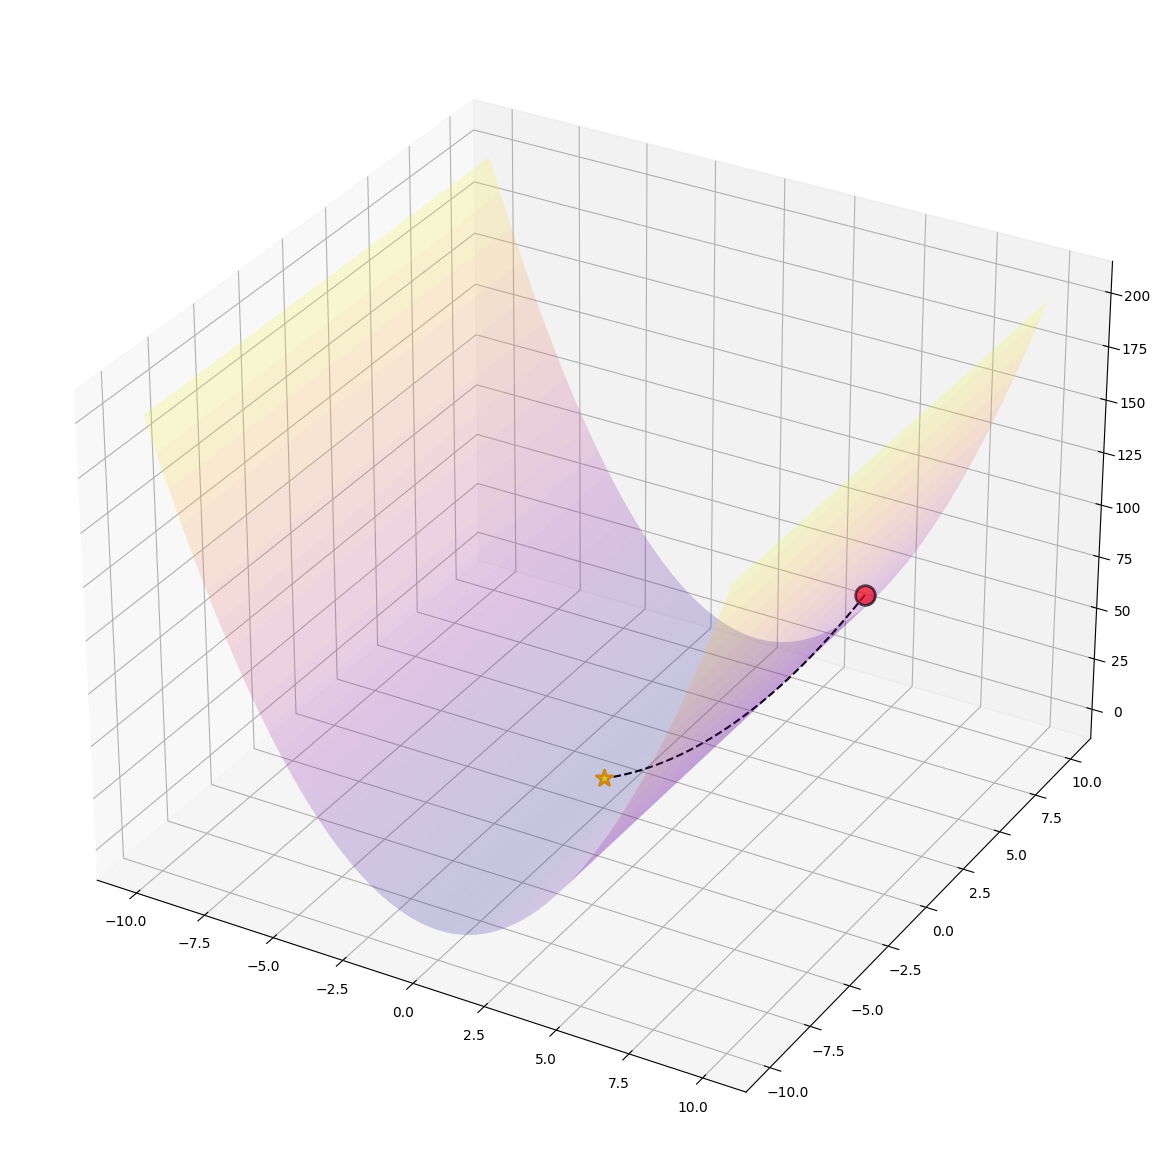

In [70]:
x, y = symbols('x y')

global Func
expn = input("Введите функцию: ")
Func = expn

gfg = sympify(expn)
start_time = datetime.now()
history = gradient_descent(func, gradient, np.array([6,6]), func_min(), max_iter = 10000, lr = 0.001)
print(f"Результаты для {expn}\n", datetime.now() - start_time)
print(history[-1])
draw_result_func(func, history)


Градиентный спуск с изменяющимся шагом обучения

In [71]:
def gradient_descent_learning_rate(f, grad, start_params, glob_min, lr_schedule, max_iter=1000, delta=0.001):


    params = start_params.copy()
    history = [np.array([params[0], params[1], f(params)])]

    step = 0
    while step < max_iter and (history[-1][2] - glob_min[2]) > delta:
        # Новое значение параметров с учетом изменяющегося шага обучения
        params = params - lr_schedule[step] * grad(params)

        # Сохраняем результат
        history.append(np.array([params[0], params[1], f(params)]))
        step += 1

    return np.array(history)

Экспоненциальный метод уменьшения шага

In [72]:
def exponential_decay(initial_lr, decay_rate, iteration):

    return [initial_lr * (decay_rate ** i) for i in range(iteration)]


Градиентный спуск с динамически изменяющейся скоростью обучения

Результаты (ф-я трехгорбого верблюда)
 0:00:00.000482
Стартовая точка:	[-2.00 -5.00 36.87]
Найденный минимум:	[1.21e-02 -2.91e-02 7.89e-04]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Погрешность результата:	-0.0007885913008871049
Кол-во шагов:	10


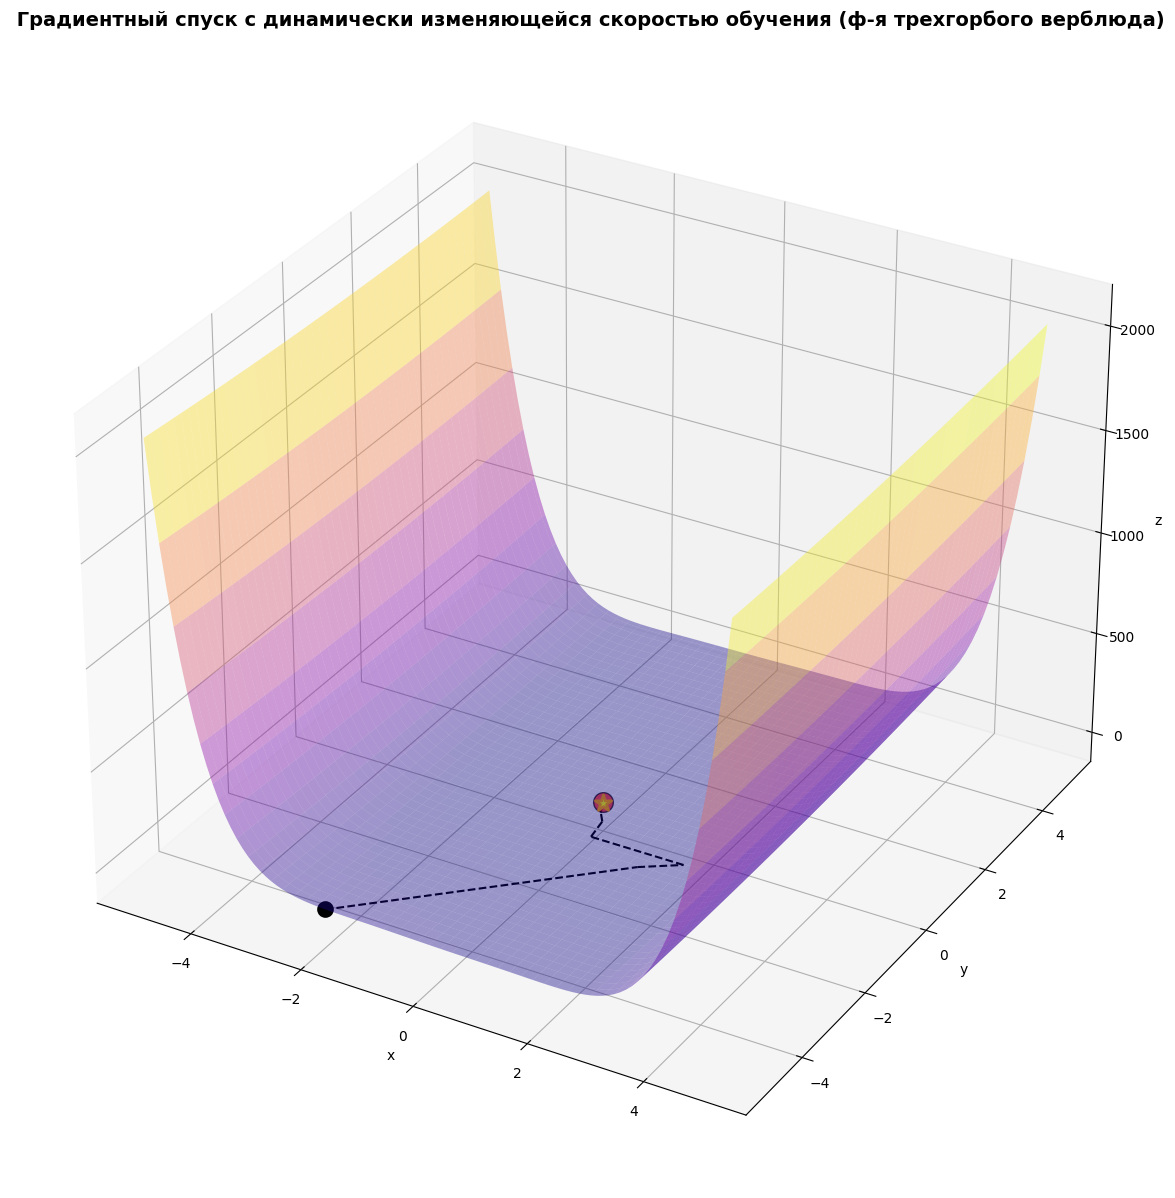

In [73]:
lr = exponential_decay(0.3, 0.99, 10000)
start_time = datetime.now()
history = gradient_descent_learning_rate(THK_func.func, THK_func.gradient, np.array([-2,-5]), THK_func.func_min(), lr, max_iter = 10000)
print("Результаты (ф-я трехгорбого верблюда)\n", datetime.now() - start_time)
draw_result(THK_func.func, THK_func.domain(), THK_func.func_min(), history, " Градиентный спуск с динамически изменяющейся скоростью обучения (ф-я трехгорбого верблюда)")
